In [1]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.widgets import Panel, Tabs,Div
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot, column, row, layout
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
from bokeh.core.properties import value

import numpy as np
output_notebook()

Loading BokehJS ...

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jrartd/jorgerobalino.co/master/carsync.csv",skiprows=[1], sep=";",parse_dates=["Fecha"])
#data = data.set_index("Fecha")
data.head()

,Fecha,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,Daily Total get direction click count per Page.1,Weekly Total get direction click count per Page.1,Daily Total phone calls click count per Page,Weekly Total phone calls click count per Page,Daily Total phone calls click count per Page.1,Weekly Total phone calls click count per Page.1,Daily Total website click count per Page,Weekly Total website click count per Page,Daily Total website click count per Page.1,Weekly Total website click count per Page.1
0,2019-04-01,25840,2.0,2.0,61.0,1518.0,3601,7248.0,95475.0,177048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-02,25842,5.0,2.0,187.0,1476.0,3654,20308.0,94412.0,175798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-03,25845,4.0,1.0,232.0,1485.0,3684,23289.0,94282.0,171660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-04,25849,5.0,NaN,242.0,1468.0,3720,24721.0,95154.0,173227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-05,25851,4.0,1.0,127.0,1326.0,3714,14669.0,91647.0,171104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#                   Tab 1

In [3]:
div25 = Div(text="""<h1>Interacciones iniciales</h1><br><br>
En estos gráficos podemos ver la audiencia ganada y perdida de forma diaria, la cantidad de nuevos followers representa un factor clave en el crecimiento de una marca y es un kpi relevante en los objetivos de cualquier estrategia. """,
width=800, height=150)

# New likes

In [4]:
# data source
source = ColumnDataSource(data={
    'date'      : data["Fecha"],
    'newlikes'  : data["Daily New Likes"],
    'Daily Unlikes'  : data["Daily Unlikes"],
    'Lifetime Total Likes'    : data['Lifetime Total Likes'],
})

p1 = figure(plot_width=600, plot_height=400, x_axis_type="datetime",title='New likes', x_axis_label='Fecha', y_axis_label='Cantidad')


     # Plot
p1.line(x="date", y="newlikes", source=source, color='navy', alpha=0.5,line_width=2)
p1.circle(x="date", y="newlikes", source=source, color='orange', fill_color="white", size=8)


    # tooltip
p1.add_tools(HoverTool(
    tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( 'newlikes',  '@{newlikes}' ), # use @{ } for field names with spaces
            ( 'Daily Unlikes',  '@{Daily Unlikes}' ), # use @{ } for field names with spaces
            ( 'Lifetime Total Likes', '@{Lifetime Total Likes}'      ),
        ],

    formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))


# unlikes

In [5]:
# data source
source = ColumnDataSource(data={
    'date'      : data["Fecha"],
    'Daily Unlikes'  : data["Daily Unlikes"],
    'newlikes'  : data["Daily New Likes"],
    'Lifetime Total Likes'    : data['Lifetime Total Likes'],
})

p4 = figure(plot_width=600, plot_height=400, x_axis_type="datetime",title='Daily Unlikes', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p1.x_range,y_range=p1.y_range)


     # Plot
p4.line(x="date", y="Daily Unlikes", source=source, color='navy', alpha=0.5,line_width=2)
p4.circle(x="date", y="Daily Unlikes", source=source, color='orange', fill_color="white", size=8)


    # tooltip
p4.add_tools(HoverTool(
    tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( 'Daily Unlikes',  '@{Daily Unlikes}' ), # use @{ } for field names with spaces
            ( 'newlikes',  '@{newlikes}' ), # use @{ } for field names with spaces
            ( 'Lifetime Total Likes', '@{Lifetime Total Likes}'      ),
        ],

    formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))


In [6]:
# Completo
source = ColumnDataSource(data={
    'date'      : data["Fecha"],
    'newlikes'  : data["Daily New Likes"],
    'Daily Unlikes'  : data["Daily Unlikes"],
    'Lifetime Total Likes'    : data['Lifetime Total Likes'],
})

p25 = figure(plot_width=600, plot_height=400, x_axis_type="datetime",title='New likes', x_axis_label='Fecha', y_axis_label='Cantidad')


     # Plot
p25.line(x="date", y="newlikes", source=source, color='navy', alpha=0.5,line_width=2)
p25.line(x="date", y="Lifetime Total Likes", source=source, color='navy', alpha=0.5,line_width=2)

    # tooltip
p25.add_tools(HoverTool(
    tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( 'newlikes',  '@{newlikes}' ), # use @{ } for field names with spaces
            ( 'Daily Unlikes',  '@{Daily Unlikes}' ), # use @{ } for field names with spaces
            ( 'Lifetime Total Likes', '@{Lifetime Total Likes}'      ),
        ],

    formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))
show(p25)

In [7]:
#union de dos graficos
l = layout([[p1,p4]],sizing_mode='fixed')
show(l)

# Tab 2

In [45]:
div = Div(text="""<h1>¿Qué significa  Impresiones en Redes Sociales?</h1><br><br>
Cuántas veces se mostró, imprimió o se sirvió tu mensaje. Sea en formato de publicación, banner, anuncio, campaña, página o cuenta. En esencia, cuántas veces se vio, en esa red en un período de tiempo dado. Le hayan hecho clic / tap o no, ya se cuenta como impresión.
Se mide en volumen de impresiones, dígase cada ocasión que se produce el evento en el que muestran tu mensaje. La gran mayoría de plataformas, cuentan como impresión, desde que se sirve o muestra el anuncio, en la pantalla del usuario, o sea que la puede ver, aunque no necesariamente la observe.<br>
<h2>Explicación de los gráficos - Impresiones</h2><br>
En los siguientes gráficos podemos ver las impresones con anuncios las cuales mediante la pauta tienen un volumen superior, esto es impulsado por los anuncios, a pesar de esto existen días donde el hay mayor impresiones exclusivamente orgánicas han llegado a generar picos, esto fue debido
a la generación de estos contenidos en horas donde la masa crítica de la audiencia esta conectada)""",
width=800, height=400)


div2 = Div(text="""<h1>¿Qué significa el alcance en Redes Sociales?</h1><br>
El Alcance en Redes Sociales, nos indica el número de personas a las que estamos llegando con nuestro contenido y es uno de los parámetros que debemos de estar midiendo en forma constante (KPIs básico). 
<br>
<h2>Explicación de los gráficos - Alcance</h2><br><br>
Podemos ver como la cantidad de personas que estan a los cuales se estan mostrando los anuncios están claramente ligadas a la pauta, los días donde no hay anuncios el alcance cae.)""",
width=800, height=400)

# Daily Paid Impressions

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,8.27

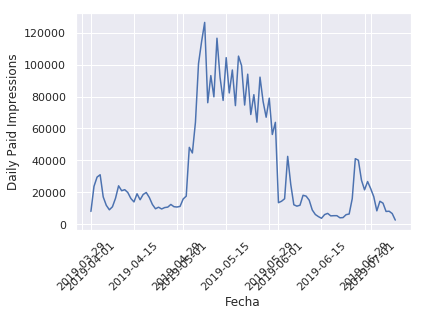

<Figure size 432x288 with 0 Axes>

In [10]:
y = data["Daily Paid Impressions"]
x = data["Fecha"]
sns.set()
# Show the survival proability as a function of age and sex
g = sns.lineplot(x="Fecha", y="Daily Paid Impressions", data=data)

plt.xticks(rotation=45)
plt.figure()


plt.show()

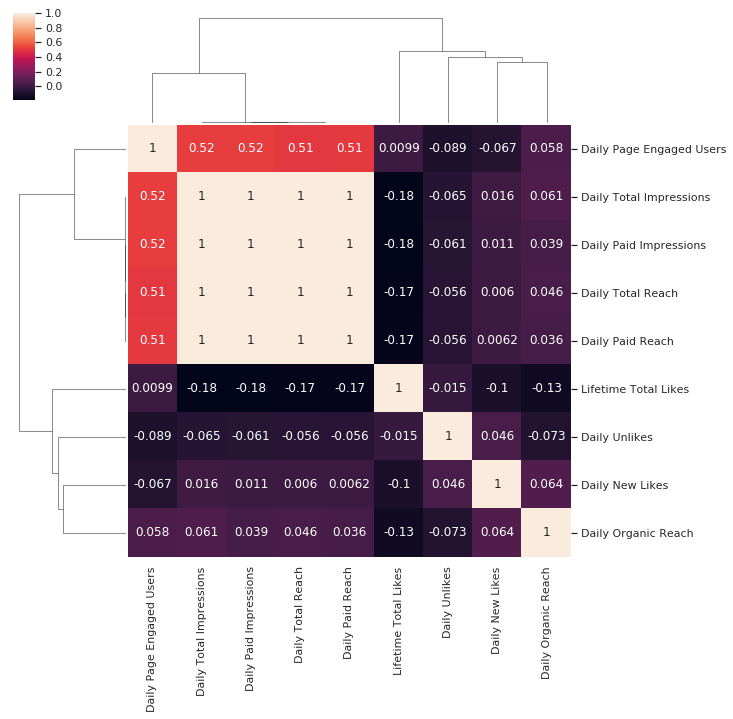

In [11]:
correl = data[["Lifetime Total Likes","Daily Page Engaged Users","Daily New Likes","Daily Unlikes","Daily Total Reach","Daily Organic Reach","Daily Paid Reach","Daily Total Impressions","Daily Paid Impressions"]]
corr_mat = correl.corr(method='pearson')
#ns.heatmap(corr_mat)
g = sns.clustermap(corr_mat,annot=True)

plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

In [12]:
data["Fecha"].describe()

count                     122
unique                    122
top       2019-04-24 00:00:00
freq                        1
first     2019-04-01 00:00:00
last      2019-07-31 00:00:00
Name: Fecha, dtype: object

In [13]:
# data source
source = ColumnDataSource(data={
        'date'      : data["Fecha"],
        'Daily Paid Impressions'  : data["Daily Paid Impressions"],
        'Lifetime Total Likes'    : data['Lifetime Total Likes'],
        'Daily Total Impressions' : data["Daily Total Impressions"]
})

p2 = figure(plot_width=600, plot_height=400, x_axis_type="datetime", title='Daily Paid Impressions', x_axis_label='Fecha', y_axis_label='Cantidad')


     # Plot
p2.line(x="date", y="Daily Paid Impressions", source=source, color='navy', alpha=0.5,line_width=2, legend="Impresiones pagadas")
p2.circle(x="date", y="Daily Paid Impressions", source=source, color='orange', fill_color="white", size=8)
p2.line(x="date", y="Daily Total Impressions", source=source, color='green', alpha=0.5,line_width=2, legend="Total de impresiones")


    # tooltip
p2.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( 'Daily Paid Impressions',  '@{Daily Paid Impressions}' ), # use @{ } for field names with spaces
            ( 'Daily Total Impressions', '@{Daily Total Impressions}'      )
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p2.legend.location = "top_left"
p2.legend.click_policy="hide"
show(p2)

# Daily Organic impressions

In [14]:
# data source
source = ColumnDataSource(data={
        'date'      : data["Fecha"],
        'Daily Organic impressions'  : data["Daily Organic impressions"],
        'Lifetime Total Likes'    : data['Lifetime Total Likes'],
            'Daily Total Impressions' : data["Daily Total Impressions"]
    
})

p3 = figure(plot_width=600, plot_height=400, x_axis_type="datetime", title='Daily Organic impressions', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p2.x_range)


     # Plot
p3.line(x="date", y="Daily Organic impressions", source=source, color='navy', alpha=0.5,line_width=2, legend="Impresiones orgánicas")
p3.circle(x="date", y="Daily Organic impressions", source=source, color='orange', fill_color="white", size=8)
p3.line(x="date", y="Daily Total Impressions", source=source, color='green', alpha=0.5,line_width=2, legend="Total de impresiones")


    # tooltip
p3.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( 'Daily Organic Impressions',  '@{Daily Organic impressions}' ), # use @{ } for field names with spaces
            ( 'Daily Total Impressions', '@{Daily Total Impressions}'      )
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p3.legend.location = "top_left"
p3.legend.click_policy="hide"
show(p3)

# Alcance pagado

In [15]:
# data source
source = ColumnDataSource(data={
        'date'      : data["Fecha"],
        'Daily Paid Reach'  : data["Daily Paid Reach"],
        'Lifetime Total Likes'    : data['Lifetime Total Likes'],
        'Daily Total Reach' : data["Daily Total Reach"]
    
})

p6 = figure(plot_width=600, plot_height=400, x_axis_type="datetime", title='Daily Paid Reach', x_axis_label='Fecha', y_axis_label='Cantidad')


     # Plot
p6.line(x="date", y="Daily Paid Reach", source=source, color='navy', alpha=0.5,line_width=2, legend = "Alcance pagado")
p6.circle(x="date", y="Daily Paid Reach", source=source, color='orange', fill_color="white", size=8)
p6.line(x="date", y="Daily Total Reach", source=source, color='green', alpha=0.5,line_width=2, legend = "Total alcance")

    # tooltip
p6.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ('Daily Paid Reach',  '@{Daily Paid Reach}' ), # use @{ } for field names with spaces
            ( 'Lifetime Total Likes', '@{Lifetime Total Likes}'      ),
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))
p6.legend.location = "top_left"
p6.legend.click_policy="hide"
show(p6)

# Alcance organico

In [16]:
# data source
source = ColumnDataSource(data={
        'date'      : data["Fecha"],
        'Daily Organic Reach'  : data["Daily Organic Reach"],
        'Lifetime Total Likes'    : data['Lifetime Total Likes'],
        'Daily Total Reach' : data["Daily Total Reach"]
})

p5 = figure(plot_width=600, plot_height=400, x_axis_type="datetime", title='Daily Organic Reach', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p6.x_range)


     # Plot
p5.line(x="date", y="Daily Organic Reach", source=source, color='navy', alpha=0.5,line_width=2, legend = "Alcance orgánico")
p5.line(x="date", y="Daily Total Reach", source=source, color='green', alpha=0.5,line_width=2, legend = "Total alcance")


    # tooltip
p5.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( 'Daily Organic Reach',  '@{Daily Organic Reach}' ), # use @{ } for field names with spaces
            ( 'Lifetime Total Likes', '@{Lifetime Total Likes}'      ),
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))
p5.legend.location = "top_left"
p5.legend.click_policy="hide"
show(p5)

# Tab3 

In [53]:
div3 = Div(text="""<h1>Audiencia femenina</h1><br>
En el primer gráfico podemos analizar como el crecimiento de las audiencias según las edades es constante aunque limitado, por lo que se recomienda tomar acciones para impulsarlo <br>
Podemos extraer que el público femenino con mayor afinidad esta en los rangos de entre 25 a 34 años """,
width=800, height=150)

div4 = Div(text="""<h2>Categorización por edad</h2><br>
En este gráfico podemos ver de forma más clara la predominancia del segmento de entre 25 a 34 años como el que más interactua y recibe los contenidos generados por nosotros. """,
width=800, height=150)

div5 = Div(text="""<br><br><h1>Audiencia Masculina</h1><br>
Al igual que en el público femenino la audiencia mas afin es la de entre 25 a 34 años cabe recalcar que la audiencia masculina es superior en un 80% con respecto a la femenina, esto es un insght importante a considerar.<br><br> """,
width=800, height=150)

div6 = Div(text="""<h2>Categorización por edad</h2><br>
En este gráfico podemos ver de forma más clara la predominancia del segmento de entre 25 a 34 años como el que más interactua y recibe los contenidos generados por nosotros. """,
width=800, height=150)

div65 = Div(text="""<h2>Correlación entre variables</h2><br>
En este gráfico realizamos una correlación Pearson entre diferentes variables para encontrar una relación que nos permita generar mejores interacciones con la audiencia
""",width=800, height=150)

div7 = Div(text="""<h2>Comparativa entre crecimiento de audiencias </h2><br>
Podemos observar que a pesar de quen la variación de públicos por rango de edad no varía, si lo hace el volumen de la audiencia la cual dentro del público masculino es notablemente superior 
""",
width=800, height=100)


div090 = Div(text="""<h1>Mejores horas de publicación</h1><br><br> """,
width=800, height=50)

In [26]:
df_data_1 = pd.read_csv("https://raw.githubusercontent.com/jrartd/jorgerobalino.co/master/user.csv",encoding = "ISO-8859-1",sep=";",parse_dates=["Fecha"])
df_data_1.head(2)

,Fecha,F.13-17,F.18-24,F.25-34,F.35-44,F.45-54,F.55-64,F.65+,M.13-17,M.18-24,...,"Santa Cruz, Galápagos Province, Ecuador","Santa Elena, Provincia de Santa Elena, Ecuador","Santa Rosa, El Oro Province, Ecuador","Santo Domingo, Provincia de Santo Domingo de los Tsáchilas, Ecuador","Santo Domingo, Santo Domingo de los Tsáchilas Province, Ecuador","Tena, Provincia de Napo, Ecuador","Tulcán, Provincia de Carchi, Ecuador","Velasco Ibarra, Provincia del Guayas, Ecuador","Ventanas, Provincia de Los Ríos, Ecuador","Vinces, Provincia de Los Ríos, Ecuador"
0,2019-04-01,55.0,306.0,3630.0,3074.0,1328.0,498.0,119.0,81.0,631.0,...,67.0,149.0,99.0,647.0,NaN,82.0,69.0,85.0,111.0,85.0
1,2019-04-02,55.0,307.0,3628.0,3077.0,1327.0,498.0,119.0,81.0,632.0,...,68.0,150.0,100.0,646.0,NaN,82.0,69.0,85.0,111.0,85.0


In [27]:
mujeres = df_data_1.iloc[:,0:8]
Hombres = df_data_1.iloc[:,8:15]
Hombres["Fecha"] = mujeres["Fecha"]
unde = df_data_1.iloc[:,15:21]

# mujeres

In [28]:
# data source
source = ColumnDataSource(data={
        'date'      : mujeres["Fecha"],
        '13-17'  : mujeres["F.13-17"],
        '18-24'  : mujeres["F.18-24"],
        '25-34'  : mujeres["F.25-34"],
        '45-54'  : mujeres["F.45-54"],
        '55-64'  : mujeres["F.55-64"],
        '65+'  : mujeres["F.65+"],
})

p7 = figure(plot_width=1000, plot_height=400, x_axis_type="datetime", title='Crecimiento diario de la audiencia de mujeres', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p6.x_range)


     # Plot
p7.line(x="date", y="13-17", source=source, color='navy', alpha=0.5,line_width=2, legend="M 13-17", hover_color='red')
p7.line(x="date", y="18-24", source=source, color='green', alpha=0.5,line_width=2, legend="M 18-24", hover_color='red')
p7.line(x="date", y="25-34", source=source, color='orange', alpha=0.5,line_width=2, legend="M 25-34", hover_color='red')
p7.line(x="date", y="45-54", source=source, color='black', alpha=0.5,line_width=2, legend="M 45-54", hover_color='red')
p7.line(x="date", y="55-64", source=source, color='blue', alpha=0.5,line_width=2, legend="M 55-64", hover_color='red')
p7.line(x="date", y="65+", source=source, color='red', alpha=0.5,line_width=2, legend="M 65+", hover_color='red')

    # tooltip
p7.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( '13-17',  '@{13-17}' ), # use @{ } for field names with spaces
            ( '18-24',  '@{18-24}' ), # use @{ } for field names with spaces
            ( '25-34',  '@{25-34}' ), # use @{ } for field names with spaces
            ( '45-54',  '@{45-54}' ), # use @{ } for field names with spaces
            ( '55-64',  '@{55-64}' ), # use @{ } for field names with spaces
            ( '65+',  '@{65+}' ), # use @{ } for field names with spaces
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        
))

p7.legend.location = "top_left"
p7.legend.click_policy="hide"
show(p7)

In [29]:
cat = ['13-17', '18-24', '25-34', '45-54', '55-64', '65+']
counts = [mujeres["F.13-17"].sum(), mujeres["F.18-24"].sum(), mujeres["F.25-34"].sum(), mujeres["F.45-54"].sum(), mujeres["F.55-64"].sum(), mujeres["F.65+"].sum()]

source = ColumnDataSource(data=dict(cat=cat, counts=counts, color=Spectral6))


p9 = figure(x_range=cat, plot_width=1000, plot_height=400, title="Demografía de mujeres según rango de edades",
           toolbar_location=None, tools="")

p9.vbar(x="cat", top="counts", width=0.9, color="color", legend= "cat", source=source)

p9.xgrid.grid_line_color = None
p9.y_range.start = 0
p9.legend.orientation = "horizontal"
p9.legend.location = "top_center"
show(p9)

In [30]:
# menor tamaño

# data source
source = ColumnDataSource(data={
        'date'      : mujeres["Fecha"],
        '13-17'  : mujeres["F.13-17"],
        '18-24'  : mujeres["F.18-24"],
        '25-34'  : mujeres["F.25-34"],
        '45-54'  : mujeres["F.45-54"],
        '55-64'  : mujeres["F.55-64"],
        '65+'  : mujeres["F.65+"],
})

p13 = figure(plot_width=500, plot_height=400, x_axis_type="datetime", title='Crecimiento diario de la audiencia de mujeres', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p6.x_range)


     # Plot
p13.line(x="date", y="13-17", source=source, color='navy', alpha=0.5,line_width=2, legend="M 13-17", hover_color='red')
p13.line(x="date", y="18-24", source=source, color='green', alpha=0.5,line_width=2, legend="M 18-24", hover_color='red')
p13.line(x="date", y="25-34", source=source, color='orange', alpha=0.5,line_width=2, legend="M 25-34", hover_color='red')
p13.line(x="date", y="45-54", source=source, color='black', alpha=0.5,line_width=2, legend="M 45-54", hover_color='red')
p13.line(x="date", y="55-64", source=source, color='blue', alpha=0.5,line_width=2, legend="M 55-64", hover_color='red')
p13.line(x="date", y="65+", source=source, color='red', alpha=0.5,line_width=2, legend="M 65+", hover_color='red')

    # tooltip
p13.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( '13-17',  '@{13-17}' ), # use @{ } for field names with spaces
            ( '18-24',  '@{18-24}' ), # use @{ } for field names with spaces
            ( '25-34',  '@{25-34}' ), # use @{ } for field names with spaces
            ( '45-54',  '@{45-54}' ), # use @{ } for field names with spaces
            ( '55-64',  '@{55-64}' ), # use @{ } for field names with spaces
            ( '65+',  '@{65+}' ), # use @{ } for field names with spaces
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        
))

p13.legend.location = "top_left"
p13.legend.click_policy="hide"
show(p13)

# Hombres

In [31]:
# data source
source = ColumnDataSource(data={
        'date'      : Hombres["Fecha"],
        '13-17'  : Hombres["M.13-17"],
        '18-24'  : Hombres["M.18-24"],
        '25-34'  : Hombres["M.25-34"],
        '45-54'  : Hombres["M.45-54"],
        '55-64'  : Hombres["M.55-64"],
        '65+'  : Hombres["M.65+"],
})

p10 = figure(plot_width=1000, plot_height=400, x_axis_type="datetime", title='Crecimiento diario de la audiencia de hombres', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p7.x_range)


     # Plot
p10.line(x="date", y="13-17", source=source, color='navy', alpha=0.5,line_width=2, legend="M 13-17", hover_color='red')
p10.line(x="date", y="18-24", source=source, color='green', alpha=0.5,line_width=2, legend="M 18-24", hover_color='red')
p10.line(x="date", y="25-34", source=source, color='orange', alpha=0.5,line_width=2, legend="M 25-34", hover_color='red')
p10.line(x="date", y="45-54", source=source, color='black', alpha=0.5,line_width=2, legend="M 45-54", hover_color='red')
p10.line(x="date", y="55-64", source=source, color='blue', alpha=0.5,line_width=2, legend="M 55-64", hover_color='red')
p10.line(x="date", y="65+", source=source, color='red', alpha=0.5,line_width=2, legend="M 65+", hover_color='red')

    # tooltip
p10.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( '13-17',  '@{13-17}' ), # use @{ } for field names with spaces
            ( '18-24',  '@{18-24}' ), # use @{ } for field names with spaces
            ( '25-34',  '@{25-34}' ), # use @{ } for field names with spaces
            ( '45-54',  '@{45-54}' ), # use @{ } for field names with spaces
            ( '55-64',  '@{55-64}' ), # use @{ } for field names with spaces
            ( '65+',  '@{65+}' ), # use @{ } for field names with spaces
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        
))

p10.legend.location = "top_left"
p10.legend.click_policy="hide"
show(p10)

In [32]:
# menor tamaño
# data source
source = ColumnDataSource(data={
        'date'      : Hombres["Fecha"],
        '13-17'  : Hombres["M.13-17"],
        '18-24'  : Hombres["M.18-24"],
        '25-34'  : Hombres["M.25-34"],
        '45-54'  : Hombres["M.45-54"],
        '55-64'  : Hombres["M.55-64"],
        '65+'  : Hombres["M.65+"],
})

p14 = figure(plot_width=500, plot_height=400, x_axis_type="datetime", title='Crecimiento diario de la audiencia de hombres', x_axis_label='Fecha', y_axis_label='Cantidad',x_range=p13.x_range,y_range=p13.y_range)


     # Plot
p14.line(x="date", y="13-17", source=source, color='navy', alpha=0.5,line_width=2, legend="M 13-17", hover_color='red')
p14.line(x="date", y="18-24", source=source, color='green', alpha=0.5,line_width=2, legend="M 18-24", hover_color='red')
p14.line(x="date", y="25-34", source=source, color='orange', alpha=0.5,line_width=2, legend="M 25-34", hover_color='red')
p14.line(x="date", y="45-54", source=source, color='black', alpha=0.5,line_width=2, legend="M 45-54", hover_color='red')
p14.line(x="date", y="55-64", source=source, color='blue', alpha=0.5,line_width=2, legend="M 55-64", hover_color='red')
p14.line(x="date", y="65+", source=source, color='red', alpha=0.5,line_width=2, legend="M 65+", hover_color='red')

    # tooltip
p14.add_tools(HoverTool(
        tooltips=[
            ( 'date',   '@date{%F}'            ),
            ( '13-17',  '@{13-17}' ), # use @{ } for field names with spaces
            ( '18-24',  '@{18-24}' ), # use @{ } for field names with spaces
            ( '25-34',  '@{25-34}' ), # use @{ } for field names with spaces
            ( '45-54',  '@{45-54}' ), # use @{ } for field names with spaces
            ( '55-64',  '@{55-64}' ), # use @{ } for field names with spaces
            ( '65+',  '@{65+}' ), # use @{ } for field names with spaces
        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        
))

p14.legend.location = "top_left"
p14.legend.click_policy="hide"
show(p14)

In [33]:

cat = ['13-17', '18-24', '25-34', '45-54', '55-64', '65+']
counts = [Hombres["M.13-17"].sum(), Hombres["M.18-24"].sum(), Hombres["M.25-34"].sum(), Hombres["M.45-54"].sum(), Hombres["M.55-64"].sum(), Hombres["M.65+"].sum()]

source = ColumnDataSource(data=dict(cat=cat, counts=counts, color=Spectral6))


p11 = figure(x_range=cat, plot_width=1000, plot_height=400, title="Demografía de mujeres según rango de edades",
           toolbar_location=None, tools="")

p11.vbar(x="cat", top="counts", width=0.9, color="color", legend= "cat", source=source)


p11.xgrid.grid_line_color = None
p11.y_range.start = 0
p11.legend.orientation = "horizontal"
p11.legend.location = "top_center"
show(p11)

In [34]:
# Stacked

fruits = ['13-17', '18-24', '25-34', '45-54', '55-64', '65+']
years = ["Hombres", "Mujeres"]
colors = ["#c9d9d3", "#718dbf"]

data = {'fruits' : fruits,
        'Hombres'   : [Hombres["M.13-17"].sum(), Hombres["M.18-24"].sum(), Hombres["M.25-34"].sum(), Hombres["M.45-54"].sum(), Hombres["M.55-64"].sum(), Hombres["M.65+"].sum()],
        'Mujeres'   : [mujeres["F.13-17"].sum(), mujeres["F.18-24"].sum(), mujeres["F.25-34"].sum(), mujeres["F.45-54"].sum(), mujeres["F.55-64"].sum(), mujeres["F.65+"].sum()]
       }

p17 = figure(x_range=fruits,plot_width=1000, plot_height=400, title="Personas alcanzadas ",
           toolbar_location=None, tools="")

p17.vbar_stack(years, x='fruits', width=0.9, color=colors, source=data,
             legend=[value(x) for x in years])

p17.add_tools(HoverTool(
        tooltips=[
            ( 'Hombres',  '@{Hombres}' ), # use @{ } for field names with spaces
            ( 'Mujeres',  '@{Mujeres}' ), # use @{ } for field names with spaces

        ],

        formatters={
            'date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                      # use default 'numeral' formatter for other fields
        },

        
))


p17.y_range.start = 0
p17.x_range.range_padding = 0.1
p17.xgrid.grid_line_color = None
p17.axis.minor_tick_line_color = None
p17.outline_line_color = None
p17.legend.location = "top_left"
p17.legend.orientation = "horizontal"
p17.legend.click_policy="hide"

show(p17)

In [35]:
from bokeh.plotting import figure, curdoc
x_range = (-20,-10) # could be anything - e.g.(0,1)
y_range = (27,30)
p60 = figure(x_range=x_range, y_range=y_range, plot_width=900, plot_height=280,toolbar_location=None, tools="")
#img_path = 'https://bokeh.pydata.org/en/latest/_static/images/logo.png'
img_path = 'https://raw.githubusercontent.com/jrartd/jorgerobalino.co/master/graficos.png'
p60.image_url(url=[img_path],x=x_range[0],y=y_range[1],w=x_range[1]-x_range[0],h=y_range[1]-y_range[0])
doc = curdoc()
doc.add_root(p60)
p60.xaxis.bounds = (2, 4)
p60.yaxis.bounds = (2, 4)

show(p60)

In [36]:
from bokeh.plotting import figure, curdoc
x_range = (-20,-10) # could be anything - e.g.(0,1)
y_range = (27,30)
p69 = figure(x_range=x_range, y_range=y_range, plot_width=800, plot_height=800,toolbar_location=None, tools="")
#img_path = 'https://bokeh.pydata.org/en/latest/_static/images/logo.png'
img_path = 'https://raw.githubusercontent.com/jrartd/jorgerobalino.co/master/descarga.png'
p69.image_url(url=[img_path],x=x_range[0],y=y_range[1],w=x_range[1]-x_range[0],h=y_range[1]-y_range[0])
doc = curdoc()
doc.add_root(p69)
p69.xaxis.bounds = (2, 4)
p69.yaxis.bounds = (2, 4)

show(p69)

# Tabs

In [54]:
tab1 = Panel(child=layout([[div25],[p1,p4],[div090],[p60],[div65],[p69]],sizing_mode='fixed'), title="Interacciones directas")
tab2 = Panel(child=layout([[div],[p2,p3],[div2],[p6,p5]],sizing_mode='fixed'), title="Alcance - Impresiones")
tab3 = Panel(child=layout([[div3],[p7],[div4],[p9],[div5],[p10],[div6],[p11],[div7],[p13,p14],[p17]],sizing_mode='fixed'), title="Descripción de usuarios")

tabs = Tabs(tabs=[tab1, tab2,tab3])

show(tabs)